本次主题是研究公司投资是由市场价值所驱动的吗？

该数据包含了11家公司，每家20年的数据。

基本式子：$invest_{it}=\alpha+\beta Market_value_{it} + \gamma Capital + \varphi_t + \rho_i + \varepsilon_{it}$  
$\rho_i为单个公司因子，\varphi_t为时间因子$

$invest_{it}=\alpha+\beta Market_value_{it} + \gamma Capital + v_t \sum_{t=1}^{h-1} I_t + \theta_j \sum_{i=1}^{N-1}D_j + \varepsilon_{it}$ $D_j是公司i的虚拟变量，I_t是t年的虚拟变量$



In [100]:
import pandas as pd
import numpy as np
from statsmodels.datasets import grunfeld
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
data=grunfeld.load_pandas().data
print(f'{data.firm.nunique()}家公司,{data.year.nunique()}个年份')
print(data.head())

print('------------------------------------------------------------')
print(f'相关性矩阵\n{np.corrcoef(data.invest,data.value)}')#这么高的相关性，那么二者之间的驱动关系又是如何呢?

11家公司,20个年份
   invest   value  capital            firm    year
0   317.6  3078.5      2.8  General Motors  1935.0
1   391.8  4661.7     52.6  General Motors  1936.0
2   410.6  5387.1    156.9  General Motors  1937.0
3   257.7  2792.2    209.2  General Motors  1938.0
4   330.8  4313.2    203.4  General Motors  1939.0
------------------------------------------------------------
相关性矩阵
[[1.         0.86248668]
 [0.86248668 1.        ]]


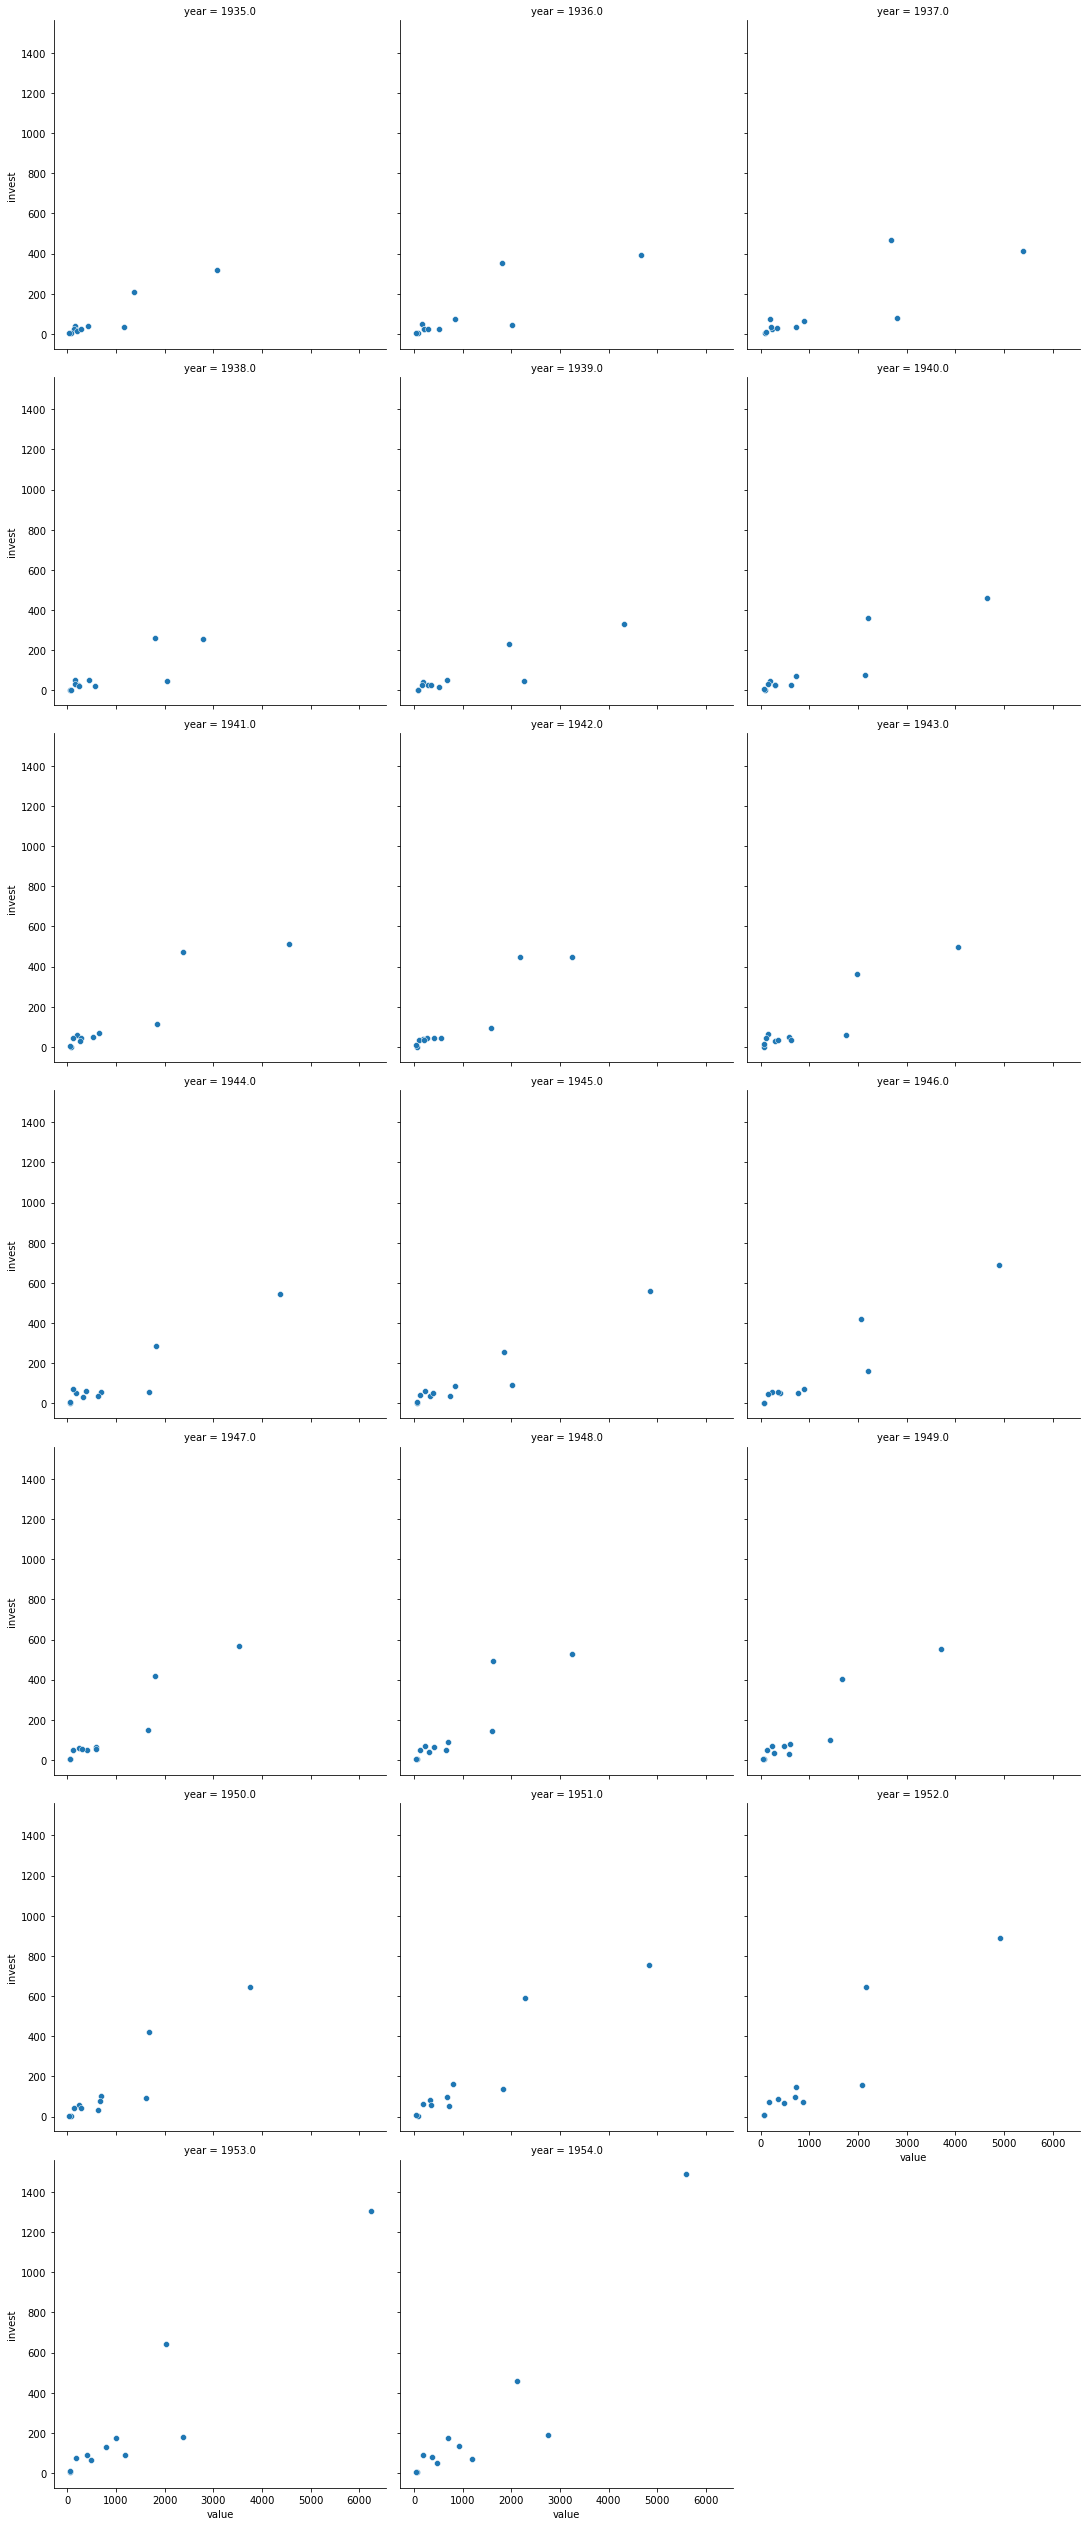

In [93]:
#绘制公司投资于市场价值之间的散点图
seaborn.relplot(x='value',y='invest',col='year',col_wrap=3,data=data,kind='scatter')
#可以看出随着不同时期下，value对于invest都有一个正向的关系

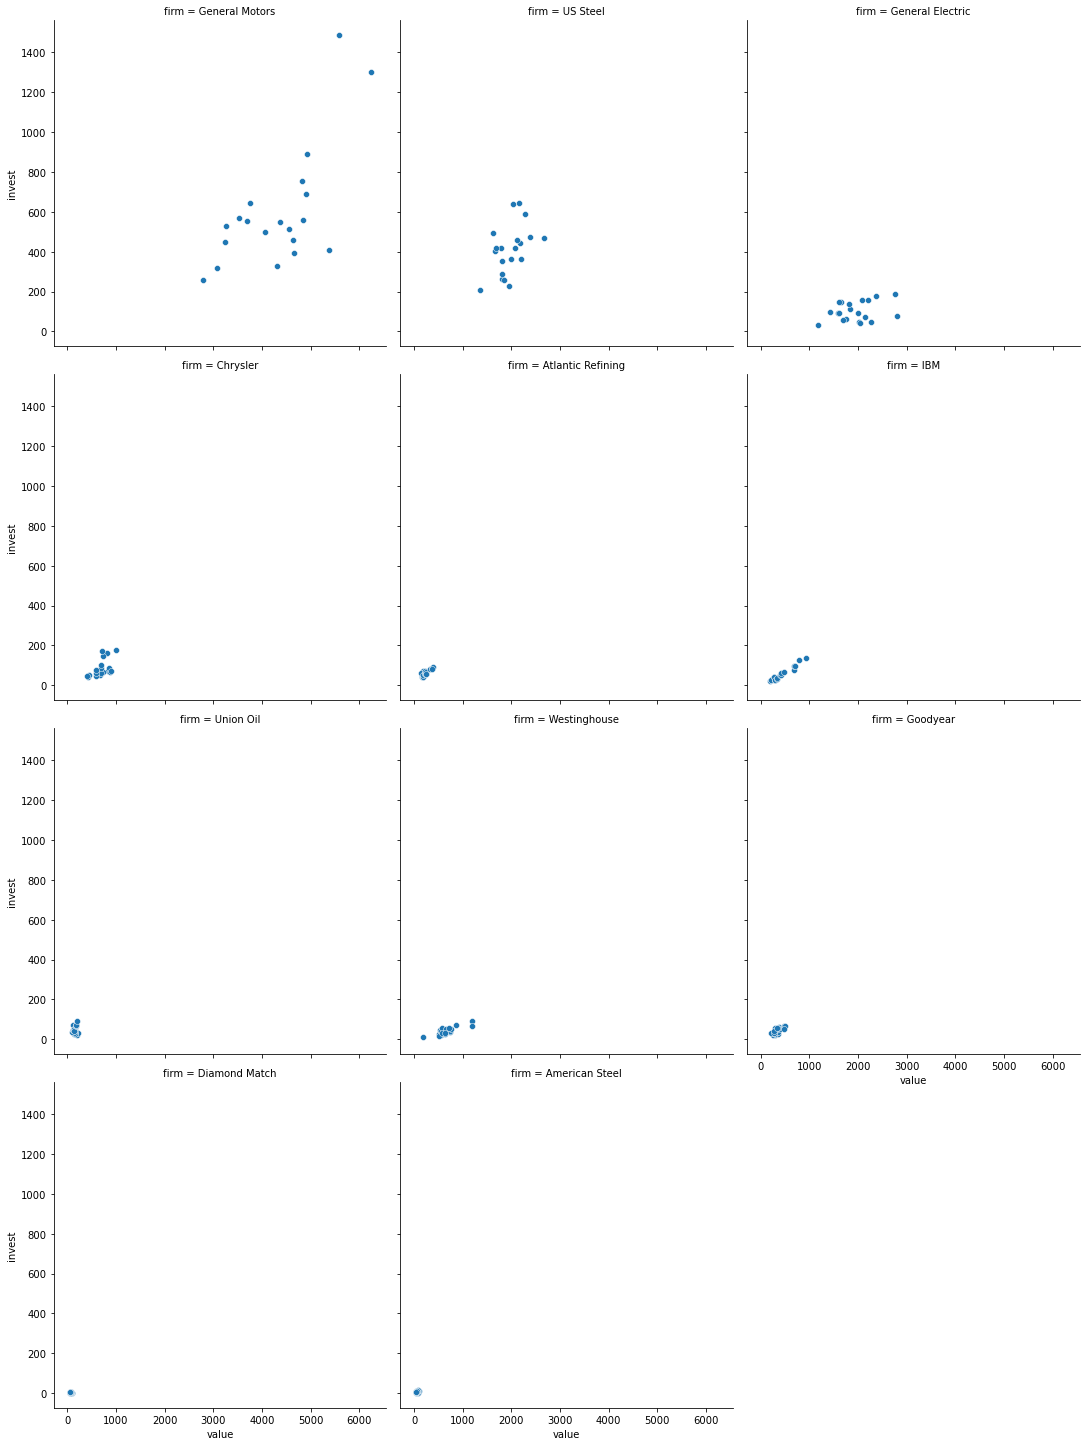

In [95]:
seaborn.relplot(x='value',y='invest',col='firm',col_wrap=3,data=data,kind='scatter')
#不同个体对于value和invest的差异性增大，可能是某些企业的value过低，没有一个空间提升invest

In [96]:
pd.set_option('display.max_rows',None)
data.set_index(['firm','year'],inplace=True)#设置面板数据形式

In [98]:
#研究invest与value之间的因果关系
exog=sm.add_constant(data[['value','capital']])#增加该方程的截距项
grunfeld_fe=PanelOLS(data['invest'],exog,entity_effects=True,time_effects=True)
grunfeld_model=grunfeld_fe.fit()
print(grunfeld_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 invest   R-squared:                        0.7253
Estimator:                   PanelOLS   R-squared (Between):              0.7944
No. Observations:                 220   R-squared (Within):               0.7566
Date:                Tue, Nov 08 2022   R-squared (Overall):              0.7856
Time:                        19:45:19   Log-likelihood                   -1153.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      248.15
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(2,188)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             248.15
                            

在控制了个体和时间变量后,避免一定的内生性问题，同时value的p值<0.05,具有统计学意义，value对invest有一个正向的驱动力

In [42]:
res_fe = PanelOLS.from_formula('invest ~ value + capital + EntityEffects + TimeEffects', data=data)
results_fe = res_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 invest   R-squared:                        0.7253
Estimator:                   PanelOLS   R-squared (Between):              0.7637
No. Observations:                 220   R-squared (Within):               0.7566
Date:                Tue, Nov 08 2022   R-squared (Overall):              0.7625
Time:                        19:06:32   Log-likelihood                   -1153.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      248.15
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(2,188)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             248.15
                            